In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [10]:
using Distributions, Statistics, CairoMakie, Random

In [4]:
d1 = Normal(-1,1)
d2 = Normal(1,1)

Normal{Float64}(μ=1.0, σ=1.0)

In [20]:
N = 100
sample1 = rand(d1,N)
sample2 = rand(d2,N)

100-element Vector{Float64}:
  0.8630405710648086
  0.2693286194372263
  0.9647000318424929
  0.7587373038668948
  1.7202596041609457
  1.1704186950801843
  1.4843641860970807
 -1.303672063384513
 -0.8949211261174441
  1.2834287938880056
  0.5672964425797693
  2.185395569465781
  2.3541548754576365
  ⋮
  2.5238256705030886
  1.408026495225929
  1.4856116220863778
  1.8777078595324106
  2.2498807929085523
  2.2487506300700515
  0.9291664238802784
  0.6714597901932724
  2.8212608216014456
  0.7175862621352784
  1.0580292405829506
  0.08895265994977408

In [21]:
sample = vcat(sample1,sample2)

200-element Vector{Float64}:
 -2.37285068552057
  0.5671388639128316
 -1.4008652629799447
 -1.8342968747034472
 -1.2174211474127776
 -2.938958139347675
  0.39324822288635275
 -0.5075527322007707
 -1.2769221302363265
  0.01804076775635033
 -0.6013656089296391
 -1.0511597290944057
  0.5827190260657007
  ⋮
  2.5238256705030886
  1.408026495225929
  1.4856116220863778
  1.8777078595324106
  2.2498807929085523
  2.2487506300700515
  0.9291664238802784
  0.6714597901932724
  2.8212608216014456
  0.7175862621352784
  1.0580292405829506
  0.08895265994977408

In [22]:
shuffle!(sample)

200-element Vector{Float64}:
 -2.342917533545294
 -1.1875867489623588
  0.5827190260657007
  0.7175862621352784
  2.111365247973599
 -1.0014943782586583
 -1.5717100689044705
  0.01804076775635033
 -0.18077174000375706
  2.50284038149887
 -0.9002039174785988
 -0.8769811404314236
 -1.8967318553098815
  ⋮
 -0.26680182165500255
  0.4083617966122698
  1.4856116220863778
  1.0580292405829506
 -3.0421232020783897
  0.8630405710648086
  1.7202596041609457
  2.147389018419416
  0.19273954937724957
 -1.356806837066612
  1.1083736982401433
 -0.6078686613382827

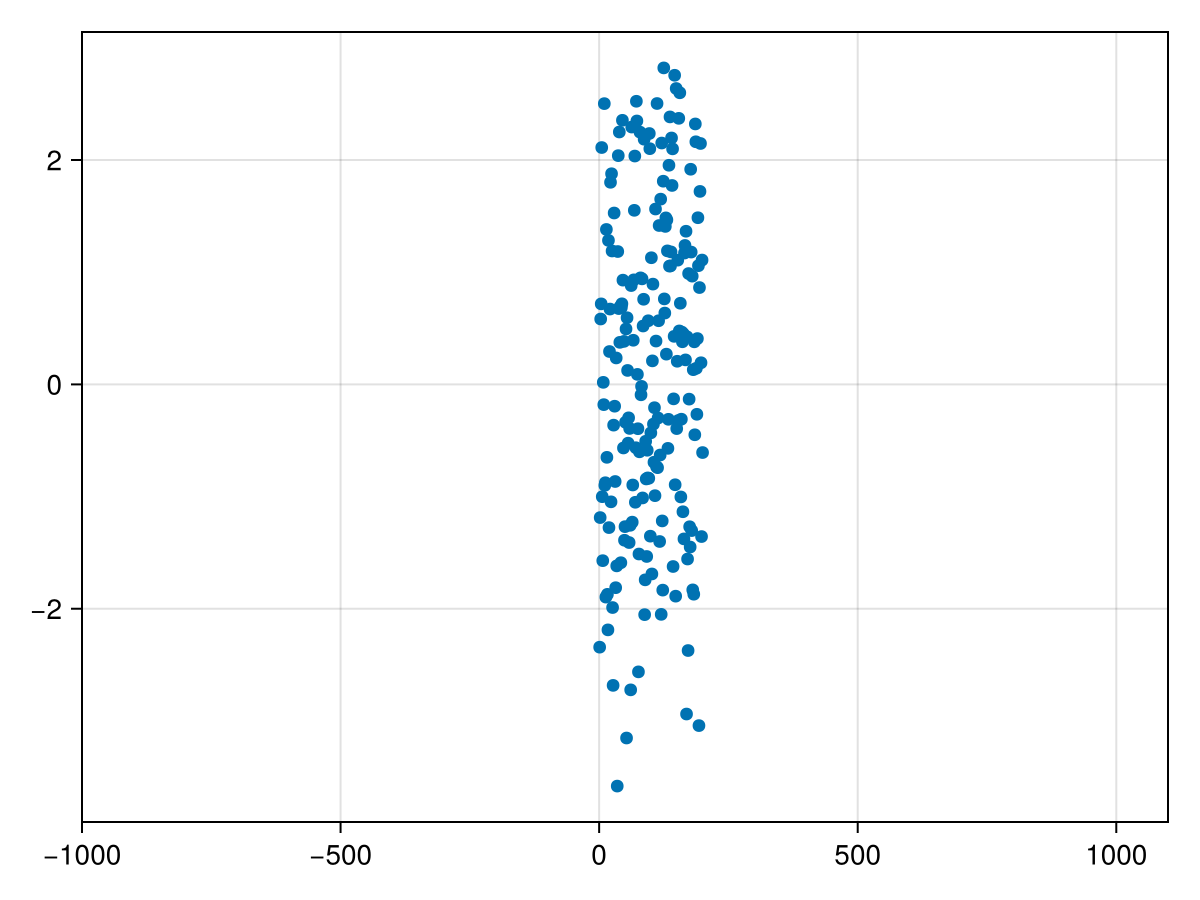

In [24]:
f = Figure()
ax = Axis(f[1,1])
xlims!(-1000,N+1000)
scatter!(ax,sample)
f